In [40]:
import json
import pandas as pd
import numpy as np
import networkx as nx
import os
import shutil
import subprocess
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import cv2
import numpy
import glob
import os
from PIL import Image

In [2]:
project_list = ['bkromhout-realm-java','btraceio-btrace','bytedeco-javacpp',
                'codecentric-spring-boot-admin', 'codenvy-legacy-che-plugins', 'coobird-thumbnailator',
                'checkstyle-checkstyle_checkstyle'
       'cryptomator-cryptomator', 'dropwizard-dropwizard',
       'dropwizard-metrics', 'evant-gradle-retrolambda',
       'facebook-facebook-android-sdk',
       'facebook-facebook-java-business-sdk', 'facebook-fresco',
       'facebook-litho', 'facebook-react-native-fbsdk', 'google-cdep',
       'google-dagger', 'google-error-prone', 'google-gitiles',
       'google-openrtb', 'google-openrtb-doubleclick', 'grpc-grpc-java',
       'havarunner-havarunner', 'immutables-immutables',
       'ionic-team-capacitor', 'jankotek-mapdb',
       'javafunk-funk', 'javaparser-javaparser',
       'jboss-switchyard-release', 'jenkinsci-jenkins', 'jhy-jsoup',
       'joelittlejohn-jsonschema2pojo',
       'knowm-XChange', 'lettuce-io-lettuce-core', 'mockito-mockito',
       'mybatis-mybatis-3', 'naver-pinpoint', 'netty-netty', 'oblac-jodd',
       'openengsb-openengsb', 'oracle-oci-java-sdk', 'oracle-opengrok',
       'oracle-spacewalk-java',
       'permissions-dispatcher-PermissionsDispatcher', 'pxb1988-dex2jar',
       'quarkusio-quarkus', 'raphw-byte-buddy', 'real-logic-aeron',
       'redisson-redisson', 'rest-assured-rest-assured',
       'robolectric-robolectric', 'rzwitserloot-lombok',
       'scribejava-scribejava', 'seleniumHQ-selenium',
       'sofastack-sofa-rpc', 'spring-projects-spring-boot',
       'spring-projects-spring-security', 'springfox-springfox',
       'square-android-times-square', 'square-okhttp', 'square-retrofit',
       'swagger-api-swagger-core', 'testcontainers-testcontainers-java',
       'uber-NullAway', 'voxeolabs-moho', 'web3j-web3j']

print(len(project_list))

66


In [3]:
len_data_arr = []
results_data_arr_agglo = []
results_data_arr_bunch = []

bunch_bool = False
bunch_hypertune = ['turbomqincrw', 'turbomqincr', 'turbomqw', 'turbomq', 'basicmq']

for root, dirs, files in os.walk('Results_28112020'):
    for file in files:
        #print(file)
        #print(file.split('_')[-1])
        if file.split('_')[-1] == 'len.txt':
            print(file, 'len')
            proj_len_file = open('Results_28112020/' + file)
            proj_name = file.split('_')[0]
            proj_len = proj_len_file.readline().replace('\n','')
            len_data_arr.append([proj_name, proj_len])
            proj_len_file.close()
        elif file.split('_')[-1] == 'results.txt':
            #print(file, 'results')
            proj_result_file = open('Results_28112020/' + file)
            proj_name = file.split('_')[0]
            
            initial_line = 2 - 1
            initial_line_result = 5 - 1
            tmp_arr = []
            
            for i, line in enumerate(proj_result_file):
                
                if i == initial_line:
                    line = line.replace('MoJo', '')
                    line = line.replace('.rsf', '')
                    line = line.replace('(', '')
                    line = line.replace(')', '')
                    line = line.split('_')
                    name = line[1].split('/')[-1]
                    #version = line[0].split('-')[-1]
                    version = line[2]
                    
                    ## If gathers results for bunch
                    if line[3] == 'exhaustive' or line[3] == 'hillclimbing' or line[3] == 'ga':
                        
                        if line[4] in bunch_hypertune:
                            bunch_bool = True
                            method = line[3]
                            calculator = line[4]
                            tmp_arr.append(name)
                            tmp_arr.append(version)
                            tmp_arr.append(method)
                            tmp_arr.append(calculator)

                        initial_line += 5

                    
                    
                    ## Else gathers results for agglomerative
                    else:
                        agglo_bool = True
                        n_cluster = line[3]
                        affinity = line[4]
                        linkage = line[5]
                        #print(line)
                        #print('Version', version)
                        initial_line += 5
                        tmp_arr.append(name)
                        tmp_arr.append(version)
                        tmp_arr.append(n_cluster)
                        tmp_arr.append(affinity)
                        tmp_arr.append(linkage)
                        
                elif i == initial_line_result:
                    n_MoJo = line.split(' ')[-1].split('\n')[0]

                    #print(line)
                    initial_line_result += 5
                    tmp_arr.append(n_MoJo)
                    #tmp_arr.append((1 - (float(n_MoJo) / float(num_class))) * 100)
                    
                    if agglo_bool == True:
                        results_data_arr_agglo.append(tmp_arr)
                        agglo_bool = False
                    elif bunch_bool == True:
                        results_data_arr_bunch.append(tmp_arr)
                        bunch_bool = False
                    tmp_arr = []
                    
                    
                
                

aws-aws-sdk-java-v2_max_len.txt len
bdew-neiaddons_max_len.txt len
bkromhout-realm-java_max_len.txt len
btraceio-btrace_max_len.txt len
bytedeco-javacpp_max_len.txt len
checkstyle-checkstyle_max_len.txt len
codecentric-spring-boot-admin_max_len.txt len
codenvy-legacy-che-plugins_max_len.txt len
coobird-thumbnailator_max_len.txt len
crate-crate_max_len.txt len
cryptomator-cryptomator_max_len.txt len
dropwizard-dropwizard_max_len.txt len
dropwizard-metrics_max_len.txt len
evant-gradle-retrolambda_max_len.txt len
facebook-facebook-android-sdk_max_len.txt len
facebook-facebook-java-business-sdk_max_len.txt len
facebook-fresco_max_len.txt len
facebook-litho_max_len.txt len
facebook-react-native-fbsdk_max_len.txt len
flyway_flyway_max_len.txt len
google-cdep_max_len.txt len
google-dagger_max_len.txt len
google-error-prone_max_len.txt len
google-exoplayer_max_len.txt len
google-gitiles_max_len.txt len
google-openrtb-doubleclick_max_len.txt len
google-openrtb_max_len.txt len
grpc-grpc-java_max

In [4]:
pd.DataFrame(results_data_arr_agglo)

,0,1,2,3,4,5
0,aws-aws-sdk-java-v2,2.9.9,5,euclidean,complete,1280
1,aws-aws-sdk-java-v2,2.9.9,5,euclidean,average,1695
2,aws-aws-sdk-java-v2,2.9.9,5,euclidean,single,644
3,aws-aws-sdk-java-v2,2.9.9,5,l1,complete,1070
4,aws-aws-sdk-java-v2,2.9.9,5,l1,average,695
...,...,...,...,...,...,...
64693,web3j-web3j,v4.5.2,25,manhattan,average,66
64694,web3j-web3j,v4.5.2,25,manhattan,single,59
64695,web3j-web3j,v4.5.2,25,cosine,complete,205
64696,web3j-web3j,v4.5.2,25,cosine,average,251


In [5]:
pd.DataFrame(results_data_arr_bunch)

,0,1,2,3,4
0,aws-aws-sdk-java-v2,2.9.9,hillclimbing,turbomqincrw,1319
1,aws-aws-sdk-java-v2,2.9.9,hillclimbing,basicmq,1533
2,aws-aws-sdk-java-v2,2.9.9,hillclimbing,turbomqincr,1475
3,aws-aws-sdk-java-v2,2.9.9,hillclimbing,turbomq,1323
4,aws-aws-sdk-java-v2,2.9.9,hillclimbing,turbomqw,1541
...,...,...,...,...,...
11191,web3j-web3j,v4.5.2,ga,turbomqincrw,360
11192,web3j-web3j,v4.5.2,ga,basicmq,336
11193,web3j-web3j,v4.5.2,ga,turbomqincr,321
11194,web3j-web3j,v4.5.2,ga,turbomq,348


In [6]:
pd.DataFrame(len_data_arr)

,0,1
0,aws-aws-sdk-java-v2,2168
1,bdew-neiaddons,38
2,bkromhout-realm-java,352
3,btraceio-btrace,495
4,bytedeco-javacpp,154
...,...,...
74,swagger-api-swagger-core,763
75,testcontainers-testcontainers-java,151
76,uber-NullAway,106
77,voxeolabs-moho,639


In [7]:
agglo_results = pd.DataFrame(results_data_arr_agglo)
agglo_results.columns = ['project_name', 'project_version', 'cluster_division', 'affinity', 'linkage', 'MoJo_results']
agglo_results = agglo_results[agglo_results['project_name'].isin(project_list)]
agglo_results.head()

,project_name,project_version,cluster_division,affinity,linkage,MoJo_results
1440,bkromhout-realm-java,v0.89.0,5,euclidean,complete,91
1441,bkromhout-realm-java,v0.89.0,5,euclidean,average,147
1442,bkromhout-realm-java,v0.89.0,5,euclidean,single,87
1443,bkromhout-realm-java,v0.89.0,5,l1,complete,76
1444,bkromhout-realm-java,v0.89.0,5,l1,average,66


In [8]:
bunch_results = pd.DataFrame(results_data_arr_bunch)
bunch_results.columns = ['project_name', 'project_version', 'method', 'calculator', 'MoJo_results']
bunch_results = bunch_results[bunch_results['project_name'].isin(project_list)]
bunch_results.head()

,project_name,project_version,method,calculator,MoJo_results
300,bkromhout-realm-java,v0.89.0,hillclimbing,turbomqincrw,239
301,bkromhout-realm-java,v0.89.0,hillclimbing,basicmq,250
302,bkromhout-realm-java,v0.89.0,hillclimbing,turbomqincr,222
303,bkromhout-realm-java,v0.89.0,hillclimbing,turbomq,238
304,bkromhout-realm-java,v0.89.0,hillclimbing,turbomqw,246


In [9]:
print(len(agglo_results['project_name'].unique()))
print(len(bunch_results['project_name'].unique()))

65
65


In [10]:
bunch_results['project_name'].unique()

array(['bkromhout-realm-java', 'btraceio-btrace', 'bytedeco-javacpp',
       'codecentric-spring-boot-admin', 'codenvy-legacy-che-plugins',
       'coobird-thumbnailator', 'dropwizard-dropwizard',
       'dropwizard-metrics', 'evant-gradle-retrolambda',
       'facebook-facebook-android-sdk',
       'facebook-facebook-java-business-sdk', 'facebook-fresco',
       'facebook-litho', 'facebook-react-native-fbsdk', 'google-cdep',
       'google-dagger', 'google-error-prone', 'google-gitiles',
       'google-openrtb-doubleclick', 'google-openrtb', 'grpc-grpc-java',
       'havarunner-havarunner', 'immutables-immutables',
       'ionic-team-capacitor', 'jankotek-mapdb', 'javafunk-funk',
       'javaparser-javaparser', 'jboss-switchyard-release',
       'jenkinsci-jenkins', 'jhy-jsoup', 'joelittlejohn-jsonschema2pojo',
       'knowm-XChange', 'lettuce-io-lettuce-core', 'mockito-mockito',
       'mybatis-mybatis-3', 'naver-pinpoint', 'netty-netty', 'oblac-jodd',
       'openengsb-openengsb', '

In [11]:
proj_len_df = pd.DataFrame(len_data_arr)
proj_len_df.columns = ['project_name', 'len']
proj_len_df.head()

,project_name,len
0,aws-aws-sdk-java-v2,2168
1,bdew-neiaddons,38
2,bkromhout-realm-java,352
3,btraceio-btrace,495
4,bytedeco-javacpp,154


In [12]:
## Remove flyway error
agglo_results = agglo_results[agglo_results['project_name'] != 'flyway']
agglo_results = agglo_results[agglo_results['project_name'] != 'mrniko-netty-socketio']



In [13]:
proj_len_df.to_csv('proj_len.csv', index=False)

In [14]:
main_df_agglo = agglo_results.merge(proj_len_df, on='project_name', how='left')
main_df_agglo['len'] = main_df_agglo['len'].astype('int32')
main_df_agglo['cluster_division'] = main_df_agglo['cluster_division'].astype('int32')
main_df_agglo['MoJo_results'] = main_df_agglo['MoJo_results'].astype('int32')
main_df_agglo['num_clusters'] = main_df_agglo['len'] // main_df_agglo['cluster_division']
main_df_agglo['accuracy'] = 1-  (main_df_agglo['MoJo_results'] / main_df_agglo['len'])
main_df_agglo = main_df_agglo[main_df_agglo['affinity'] != 'l2']
main_df_agglo = main_df_agglo[main_df_agglo['affinity'] != 'l1']
main_df_agglo = main_df_agglo[main_df_agglo['accuracy'] != 1]

#main_df_agglo = main_df_agglo[main_df_agglo['cluster_division'] == 25]
#main_df_agglo = main_df_agglo[main_df_agglo['linkage'] == 'single']

main_df_agglo['algo'] = 'algo_' + main_df_agglo['affinity'] + '_' + main_df_agglo['linkage'] + '_' + main_df_agglo['cluster_division'].astype(str)
main_df_agglo['Instances'] = main_df_agglo['project_name'] + '_' + main_df_agglo['project_version']
main_df_agglo = main_df_agglo.drop(columns=['project_name', 'project_version', 'cluster_division', 'affinity', 'linkage', 'MoJo_results', 'len', 'num_clusters'])

main_df_agglo = pd.pivot_table(main_df_agglo, values=['accuracy'], index=['Instances'], columns=['algo'])
main_df_agglo['Instances'] = main_df_agglo.index
main_df_agglo = main_df_agglo.reset_index(drop=True)
#main_df_agglo = main_df_agglo.groupby(['project_name', 'project_version']).apply(lambda x: x.nlargest(1, "accuracy")).reset_index(drop=True)
#print(main_df_agglo.columns.droplevel())
main_df_agglo.columns = main_df_agglo.columns.droplevel()

main_df_agglo.rename(columns={'':'Instances'}, inplace=True)
#main_df_agglo.columns = final_columns

main_df_agglo = main_df_agglo.fillna(0)

main_df_agglo.head(10)

algo,algo_cosine_average_10,algo_cosine_average_15,algo_cosine_average_20,algo_cosine_average_25,algo_cosine_average_5,algo_cosine_average_7,algo_cosine_complete_10,algo_cosine_complete_15,algo_cosine_complete_20,algo_cosine_complete_25,...,algo_manhattan_complete_25,algo_manhattan_complete_5,algo_manhattan_complete_7,algo_manhattan_single_10,algo_manhattan_single_15,algo_manhattan_single_20,algo_manhattan_single_25,algo_manhattan_single_5,algo_manhattan_single_7,Instances
0,0.823864,0.840909,0.849432,0.900568,0.704545,0.747159,0.730114,0.786932,0.809659,0.818182,...,0.897727,0.826705,0.857955,0.903409,0.920455,0.920455,0.923295,0.860795,0.883523,bkromhout-realm-java_v0.87.1
1,0.826705,0.843750,0.849432,0.900568,0.704545,0.750000,0.718750,0.778409,0.801136,0.812500,...,0.892045,0.826705,0.855114,0.900568,0.909091,0.914773,0.917614,0.857955,0.883523,bkromhout-realm-java_v0.87.2
2,0.801136,0.826705,0.832386,0.838068,0.670455,0.727273,0.670455,0.738636,0.769886,0.784091,...,0.883523,0.786932,0.843750,0.880682,0.892045,0.900568,0.906250,0.832386,0.866477,bkromhout-realm-java_v0.87.3
3,0.798295,0.823864,0.829545,0.835227,0.667614,0.724432,0.667614,0.735795,0.769886,0.784091,...,0.883523,0.786932,0.843750,0.880682,0.892045,0.900568,0.906250,0.832386,0.866477,bkromhout-realm-java_v0.87.4
4,0.803977,0.823864,0.826705,0.832386,0.647727,0.721591,0.673295,0.741477,0.772727,0.775568,...,0.880682,0.815341,0.846591,0.883523,0.900568,0.900568,0.906250,0.843750,0.872159,bkromhout-realm-java_v0.87.5
5,0.784091,0.838068,0.846591,0.903409,0.693182,0.718750,0.690341,0.812500,0.869318,0.894886,...,0.903409,0.835227,0.869318,0.900568,0.911932,0.920455,0.917614,0.869318,0.889205,bkromhout-realm-java_v0.88.0
6,0.772727,0.838068,0.846591,0.897727,0.681818,0.710227,0.681818,0.826705,0.875000,0.880682,...,0.903409,0.840909,0.872159,0.903409,0.911932,0.920455,0.917614,0.869318,0.892045,bkromhout-realm-java_v0.88.1
7,0.755682,0.823864,0.835227,0.840909,0.659091,0.684659,0.673295,0.812500,0.875000,0.897727,...,0.897727,0.829545,0.863636,0.894886,0.911932,0.914773,0.911932,0.860795,0.880682,bkromhout-realm-java_v0.88.2
8,0.772727,0.821023,0.838068,0.838068,0.647727,0.727273,0.647727,0.826705,0.860795,0.872159,...,0.900568,0.823864,0.860795,0.889205,0.903409,0.909091,0.911932,0.857955,0.875000,bkromhout-realm-java_v0.88.3
9,0.730114,0.778409,0.849432,0.855114,0.590909,0.661932,0.633523,0.755682,0.795455,0.809659,...,0.866477,0.784091,0.806818,0.852273,0.863636,0.875000,0.877841,0.815341,0.840909,bkromhout-realm-java_v0.89.0


In [15]:
main_df_bunch = bunch_results.merge(proj_len_df, on='project_name', how='left')
main_df_bunch['len'] = main_df_bunch['len'].astype('int32')
main_df_bunch['MoJo_results'] = main_df_bunch['MoJo_results'].astype('int32')
main_df_bunch['accuracy'] = 1-  (main_df_bunch['MoJo_results'] / main_df_bunch['len'])
#main_df_bunch = main_df_bunch.groupby(['project_name', 'project_version']).apply(lambda x: x.nlargest(1, "accuracy")).reset_index(drop=True)

main_df_bunch['algo'] = 'algo_' + main_df_bunch['method'] + '_' + main_df_bunch['calculator']
main_df_bunch['Instances'] = main_df_bunch['project_name'] + '_' + main_df_bunch['project_version']
main_df_bunch = main_df_bunch.drop(columns=['project_name', 'project_version', 'method', 'calculator', 'MoJo_results', 'len'])

main_df_bunch = pd.pivot_table(main_df_bunch, values=['accuracy'], index=['Instances'], columns=['algo'])
main_df_bunch['Instances'] = main_df_bunch.index
main_df_bunch = main_df_bunch.reset_index(drop=True)

main_df_bunch.columns = main_df_bunch.columns.droplevel()
main_df_bunch.rename(columns={'':'Instances'}, inplace=True)
main_df_bunch = main_df_bunch.fillna(0)




main_df_bunch.head(10)

algo,algo_exhaustive_basicmq,algo_exhaustive_turbomq,algo_exhaustive_turbomqincr,algo_exhaustive_turbomqincrw,algo_exhaustive_turbomqw,algo_ga_basicmq,algo_ga_turbomq,algo_ga_turbomqincr,algo_ga_turbomqincrw,algo_ga_turbomqw,algo_hillclimbing_basicmq,algo_hillclimbing_turbomq,algo_hillclimbing_turbomqincr,algo_hillclimbing_turbomqincrw,algo_hillclimbing_turbomqw,Instances
0,0.508523,0.488636,0.491477,0.525568,0.588068,0.454545,0.502841,0.488636,0.451705,0.440341,0.485795,0.525568,0.446023,0.463068,0.454545,bkromhout-realm-java_v0.87.1
1,0.434659,0.434659,0.474432,0.448864,0.454545,0.437500,0.497159,0.545455,0.460227,0.426136,0.440341,0.457386,0.434659,0.463068,0.465909,bkromhout-realm-java_v0.87.2
2,0.468750,0.485795,0.482955,0.460227,0.482955,0.428977,0.545455,0.494318,0.505682,0.465909,0.460227,0.647727,0.500000,0.431818,0.559659,bkromhout-realm-java_v0.87.3
3,0.500000,0.522727,0.471591,0.428977,0.539773,0.514205,0.514205,0.448864,0.477273,0.465909,0.468750,0.468750,0.477273,0.440341,0.471591,bkromhout-realm-java_v0.87.4
4,0.463068,0.434659,0.440341,0.471591,0.494318,0.471591,0.434659,0.593750,0.497159,0.488636,0.502841,0.480114,0.474432,0.465909,0.539773,bkromhout-realm-java_v0.87.5
5,0.394886,0.426136,0.428977,0.434659,0.360795,0.386364,0.369318,0.369318,0.338068,0.468750,0.375000,0.437500,0.394886,0.363636,0.369318,bkromhout-realm-java_v0.88.0
6,0.315341,0.321023,0.389205,0.400568,0.346591,0.383523,0.392045,0.403409,0.426136,0.360795,0.383523,0.468750,0.332386,0.482955,0.377841,bkromhout-realm-java_v0.88.1
7,0.380682,0.431818,0.349432,0.417614,0.389205,0.338068,0.335227,0.426136,0.434659,0.383523,0.423295,0.548295,0.448864,0.451705,0.397727,bkromhout-realm-java_v0.88.2
8,0.369318,0.534091,0.497159,0.377841,0.380682,0.375000,0.349432,0.389205,0.392045,0.366477,0.360795,0.389205,0.357955,0.500000,0.366477,bkromhout-realm-java_v0.88.3
9,0.394886,0.289773,0.255682,0.261364,0.289773,0.332386,0.281250,0.326705,0.286932,0.335227,0.289773,0.323864,0.369318,0.321023,0.301136,bkromhout-realm-java_v0.89.0


In [16]:
combine_df = main_df_agglo.merge(main_df_bunch, how='inner', on=['Instances'])
combine_df.head()

algo,algo_cosine_average_10,algo_cosine_average_15,algo_cosine_average_20,algo_cosine_average_25,algo_cosine_average_5,algo_cosine_average_7,algo_cosine_complete_10,algo_cosine_complete_15,algo_cosine_complete_20,algo_cosine_complete_25,...,algo_ga_basicmq,algo_ga_turbomq,algo_ga_turbomqincr,algo_ga_turbomqincrw,algo_ga_turbomqw,algo_hillclimbing_basicmq,algo_hillclimbing_turbomq,algo_hillclimbing_turbomqincr,algo_hillclimbing_turbomqincrw,algo_hillclimbing_turbomqw
0,0.823864,0.840909,0.849432,0.900568,0.704545,0.747159,0.730114,0.786932,0.809659,0.818182,...,0.454545,0.502841,0.488636,0.451705,0.440341,0.485795,0.525568,0.446023,0.463068,0.454545
1,0.826705,0.843750,0.849432,0.900568,0.704545,0.750000,0.718750,0.778409,0.801136,0.812500,...,0.437500,0.497159,0.545455,0.460227,0.426136,0.440341,0.457386,0.434659,0.463068,0.465909
2,0.801136,0.826705,0.832386,0.838068,0.670455,0.727273,0.670455,0.738636,0.769886,0.784091,...,0.428977,0.545455,0.494318,0.505682,0.465909,0.460227,0.647727,0.500000,0.431818,0.559659
3,0.798295,0.823864,0.829545,0.835227,0.667614,0.724432,0.667614,0.735795,0.769886,0.784091,...,0.514205,0.514205,0.448864,0.477273,0.465909,0.468750,0.468750,0.477273,0.440341,0.471591
4,0.803977,0.823864,0.826705,0.832386,0.647727,0.721591,0.673295,0.741477,0.772727,0.775568,...,0.471591,0.434659,0.593750,0.497159,0.488636,0.502841,0.480114,0.474432,0.465909,0.539773


In [17]:
ck_max = pd.read_csv('ck_max_194.csv')
ck_std = pd.read_csv('ck_std_194.csv')
ck_mean = pd.read_csv('ck_mean_194.csv')
ck_sum = pd.read_csv('ck_sum_194.csv')

In [18]:
ck_max_column = ['project_name', 'project_version']
ck_std_column = ['project_name', 'project_version']
ck_mean_column = ['project_name', 'project_version']
ck_sum_column = ['project_name', 'project_version']

excluded_columns = ['project_name', 'project_version']



for element in ck_max.columns:
    #print(element)
    if element not in excluded_columns:
        ck_max_column.append('feature_' + element + '_max')
   
        
        
for element in ck_std.columns:
    #print(element)
    if element not in excluded_columns:
        ck_std_column.append('feature_' + element + '_std')
        
for element in ck_mean.columns:
    #print(element)
    if element not in excluded_columns:
        ck_mean_column.append('feature_' + element + '_mean')
        
for element in ck_sum.columns:
    #print(element)
    if element not in excluded_columns:
        ck_sum_column.append('feature_' + element + '_sum')
    
        
ck_max.columns = ck_max_column
ck_std.columns = ck_std_column
ck_sum.columns = ck_sum_column
ck_mean.columns = ck_mean_column




In [19]:
ck_max['Instances'] = ck_max['project_name'] + '_' + ck_max['project_version']
ck_std['Instances'] = ck_std['project_name'] + '_' + ck_std['project_version']
ck_sum['Instances'] = ck_sum['project_name'] + '_' + ck_sum['project_version']
ck_mean['Instances'] = ck_mean['project_name'] + '_' + ck_mean['project_version']

ck_max = ck_max.drop(columns=['project_name', 'project_version'])
ck_std = ck_std.drop(columns=['project_name', 'project_version'])
ck_sum = ck_sum.drop(columns=['project_name', 'project_version'])
ck_mean = ck_mean.drop(columns=['project_name', 'project_version'])


In [20]:
ck_max.head()

,feature_cbo_max,feature_wmc_max,feature_dit_max,feature_rfc_max,feature_lcom_max,feature_totalMethods_max,feature_staticMethods_max,feature_publicMethods_max,feature_privateMethods_max,feature_protectedMethods_max,...,feature_assignmentsQty_max,feature_mathOperationsQty_max,feature_variablesQty_max,feature_maxNestedBlocks_max,feature_anonymousClassesQty_max,feature_subClassesQty_max,feature_lambdasQty_max,feature_uniqueWordsQty_max,feature_modifiers_max,Instances
0,79.0,203.0,17.0,200.0,6811.0,131.0,58.0,123.0,50.0,23.0,...,353.0,195.0,297.0,6.0,21.0,13.0,0.0,573.0,1025.0,JodaOrg-joda-time_v2.10.6
1,78.0,203.0,17.0,194.0,6578.0,129.0,71.0,121.0,50.0,23.0,...,353.0,195.0,292.0,6.0,21.0,13.0,0.0,553.0,1025.0,JodaOrg-joda-time_v2.2
2,78.0,203.0,17.0,194.0,6811.0,129.0,58.0,121.0,50.0,23.0,...,353.0,195.0,292.0,6.0,21.0,13.0,0.0,554.0,1025.0,JodaOrg-joda-time_v2.3
3,78.0,203.0,17.0,195.0,6811.0,131.0,58.0,123.0,50.0,23.0,...,353.0,195.0,297.0,6.0,21.0,13.0,0.0,554.0,1025.0,JodaOrg-joda-time_v2.4
4,78.0,203.0,17.0,195.0,6811.0,131.0,58.0,123.0,50.0,23.0,...,353.0,195.0,297.0,6.0,21.0,13.0,0.0,561.0,1025.0,JodaOrg-joda-time_v2.5


In [21]:
ck_main_df = ck_max.merge(ck_mean, how='inner', on=['Instances'])
ck_main_df = ck_main_df.merge(ck_std, how='inner', on=['Instances'])
ck_main_df = ck_main_df.merge(ck_sum, how='inner', on=['Instances'])
ck_main_df.head()

,feature_cbo_max,feature_wmc_max,feature_dit_max,feature_rfc_max,feature_lcom_max,feature_totalMethods_max,feature_staticMethods_max,feature_publicMethods_max,feature_privateMethods_max,feature_protectedMethods_max,...,feature_numbersQty_sum,feature_assignmentsQty_sum,feature_mathOperationsQty_sum,feature_variablesQty_sum,feature_maxNestedBlocks_sum,feature_anonymousClassesQty_sum,feature_subClassesQty_sum,feature_lambdasQty_sum,feature_uniqueWordsQty_sum,feature_modifiers_sum
0,79.0,203.0,17.0,200.0,6811.0,131.0,58.0,123.0,50.0,23.0,...,47922.0,15520.0,4602.0,11373.0,362.0,80.0,146.0,0.0,42625.0,35990.0
1,78.0,203.0,17.0,194.0,6578.0,129.0,71.0,121.0,50.0,23.0,...,44556.0,14714.0,4299.0,10646.0,344.0,71.0,140.0,0.0,40774.0,35968.0
2,78.0,203.0,17.0,194.0,6811.0,129.0,58.0,121.0,50.0,23.0,...,45198.0,14760.0,4279.0,10692.0,347.0,74.0,140.0,0.0,40933.0,35969.0
3,78.0,203.0,17.0,195.0,6811.0,131.0,58.0,123.0,50.0,23.0,...,46195.0,15053.0,4499.0,10951.0,359.0,77.0,141.0,0.0,41722.0,35971.0
4,78.0,203.0,17.0,195.0,6811.0,131.0,58.0,123.0,50.0,23.0,...,46552.0,15154.0,4499.0,11053.0,361.0,78.0,143.0,0.0,42007.0,35987.0


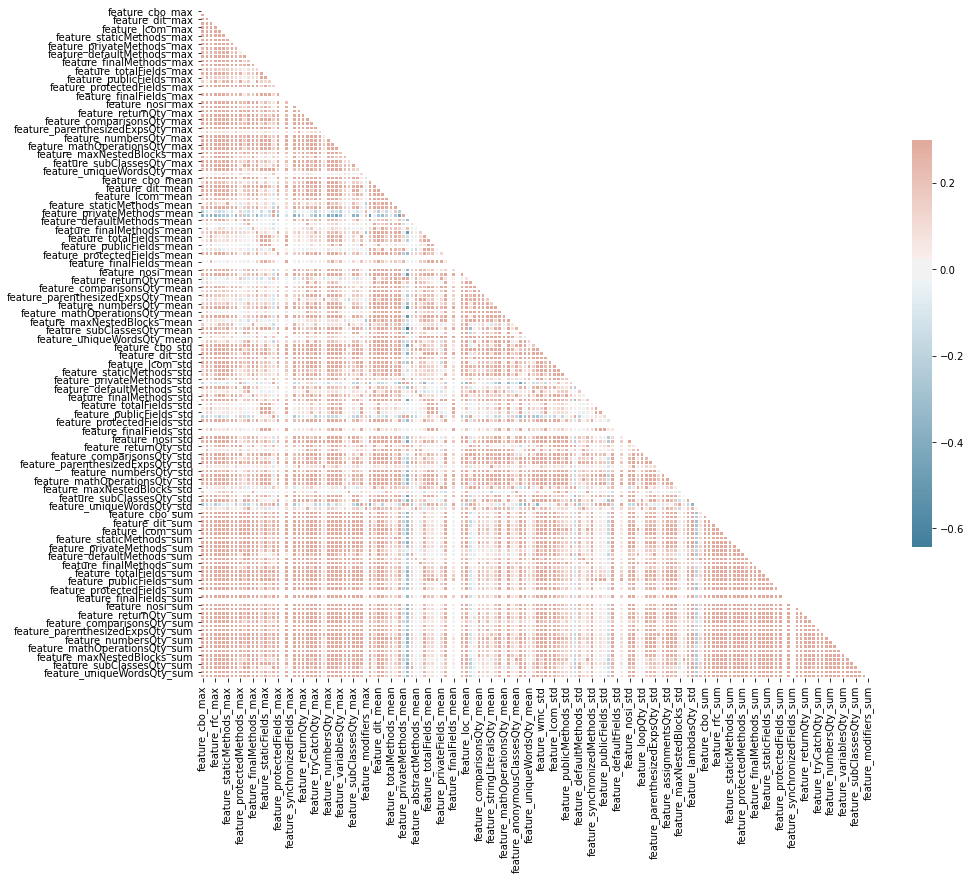

In [27]:
corr = ck_main_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(15, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
main_df_agglo_corr = []
total_agglo_corr = []
for column in main_df_agglo.columns:
    if column != "Instances":
        corr_algo = main_df_agglo[[column, "Instances"]]
        corr_algo = corr_algo.merge(ck_main_df, how='inner', on=['Instances'])
        corr_algo = corr_algo.drop(columns=['Instances'])
        ix = corr_algo.corr().sort_values(column, ascending=False).index
        corr_algo_df = corr_algo.loc[:, ix]
        temp = []
        temp.append(column)
        for element in corr_algo_df.columns[1:21]:
            temp.append(element)
            total_agglo_corr.append(element)
        main_df_agglo_corr.append(temp)
        #algo_columns.append(column)

top15_agglo_corr_df = pd.DataFrame(pd.Series(total_agglo_corr).value_counts()).sort_values(by=0, ascending=False)
top15_agglo_corr_df['algo'] = top15_agglo_corr_df.index

agglo_high_corr_cols = top15_agglo_corr_df['algo'].head(15).values

print(agglo_high_corr_cols)

top15_agglo_corr_df.head(15)

['feature_staticMethods_mean' 'feature_maxNestedBlocks_mean'
 'feature_maxNestedBlocks_std' 'feature_uniqueWordsQty_mean'
 'feature_totalMethods_mean' 'feature_staticMethods_std'
 'feature_privateMethods_mean' 'feature_subClassesQty_mean'
 'feature_modifiers_max' 'feature_uniqueWordsQty_std' 'feature_cbo_mean'
 'feature_returnQty_mean' 'feature_publicMethods_mean' 'feature_dit_mean'
 'feature_anonymousClassesQty_mean']


,0,algo
feature_staticMethods_mean,35,feature_staticMethods_mean
feature_maxNestedBlocks_mean,33,feature_maxNestedBlocks_mean
feature_maxNestedBlocks_std,31,feature_maxNestedBlocks_std
feature_uniqueWordsQty_mean,30,feature_uniqueWordsQty_mean
feature_totalMethods_mean,29,feature_totalMethods_mean
feature_staticMethods_std,29,feature_staticMethods_std
feature_privateMethods_mean,28,feature_privateMethods_mean
feature_subClassesQty_mean,28,feature_subClassesQty_mean
feature_modifiers_max,27,feature_modifiers_max
feature_uniqueWordsQty_std,27,feature_uniqueWordsQty_std


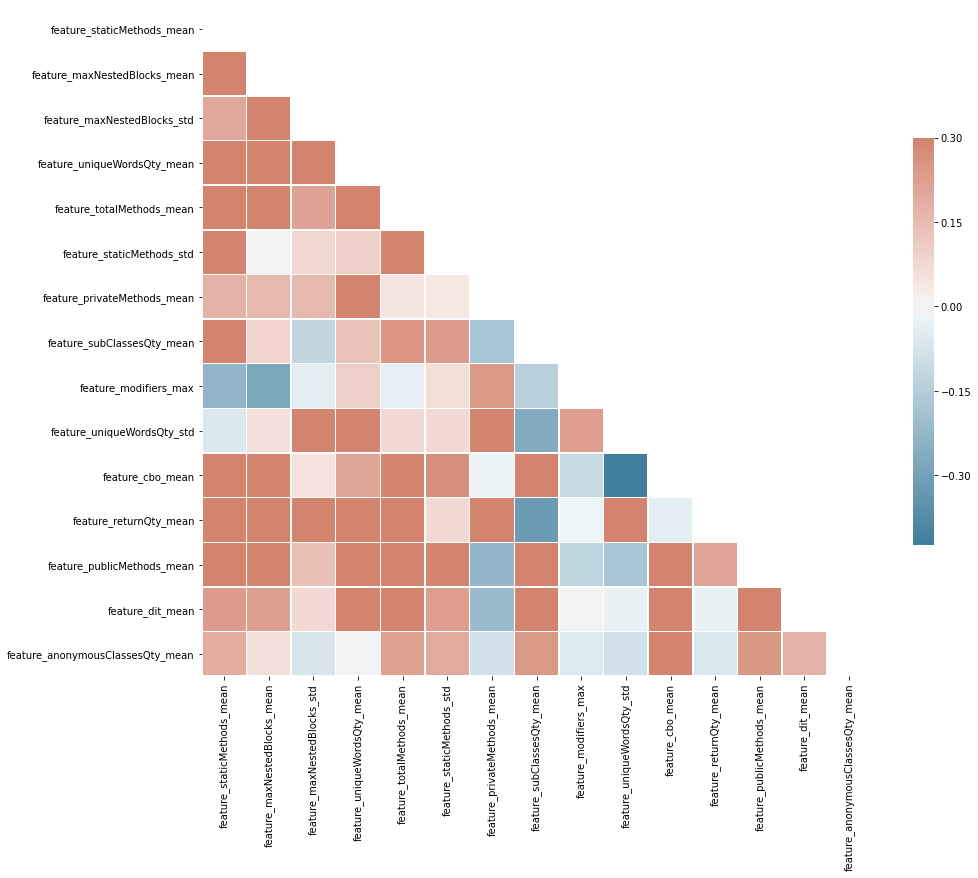

In [30]:
corr = ck_main_df[agglo_high_corr_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(15, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
corr_algo_df.corr()

,algo_manhattan_single_7,feature_staticMethods_std,feature_subClassesQty_max,feature_stringLiteralsQty_std,feature_staticMethods_max,feature_anonymousClassesQty_sum,feature_stringLiteralsQty_max,feature_subClassesQty_sum,feature_abstractMethods_sum,feature_cbo_max,...,feature_loc_std,feature_loc_mean,feature_defaultFields_max,feature_synchronizedFields_max,feature_defaultFields_mean,feature_synchronizedFields_mean,feature_defaultFields_std,feature_synchronizedFields_std,feature_defaultFields_sum,feature_synchronizedFields_sum
algo_manhattan_single_7,1.000000,0.238641,0.187684,0.186659,0.183142,0.176944,0.167575,0.155248,0.111550,0.102123,...,-0.316195,-0.344602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_staticMethods_std,0.238641,1.000000,0.012317,0.420315,0.922504,0.174554,0.485536,-0.011051,0.032077,0.079226,...,0.040529,0.001495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_subClassesQty_max,0.187684,0.012317,1.000000,0.259655,0.145027,0.498480,0.555375,0.691696,0.699620,0.476277,...,0.163441,0.040947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_stringLiteralsQty_std,0.186659,0.420315,0.259655,1.000000,0.374496,-0.066238,0.820187,-0.005115,0.269904,0.112911,...,0.256183,0.099624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_staticMethods_max,0.183142,0.922504,0.145027,0.374496,1.000000,0.241389,0.554704,0.180098,0.164648,0.258640,...,-0.018653,-0.122673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_synchronizedFields_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_defaultFields_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_synchronizedFields_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_defaultFields_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
pd.DataFrame(main_df_agglo_corr).head()
pd.DataFrame(main_df_agglo_corr).to_csv('agglo_corr_top20.csv', index=False)

In [144]:
main_df_bunch_corr = []
total_bunch_corr = []
for column in main_df_bunch.columns:
    if column != "Instances":
        corr_algo = main_df_bunch[[column, "Instances"]]
        corr_algo = corr_algo.merge(ck_main_df, how='inner', on=['Instances'])
        corr_algo = corr_algo.drop(columns=['Instances'])
        ix = corr_algo.corr().sort_values(column, ascending=False).index
        corr_algo_df = corr_algo.loc[:, ix]
        temp = []
        temp.append(column)
        for element in corr_algo_df.columns[1:21]:
            temp.append(element)
            total_bunch_corr.append(element)
        main_df_bunch_corr.append(temp)
        #algo_columns.append(column)

top15_bunch_corr_df = pd.DataFrame(pd.Series(total_bunch_corr).value_counts()).sort_values(by=0, ascending=False)
top15_bunch_corr_df['algo'] = top15_bunch_corr_df.index

bunch_high_corr_cols = top15_bunch_corr_df['algo'].head(15).values

print(bunch_high_corr_cols)

top15_bunch_corr_df.head(15)

['feature_loc_mean' 'feature_protectedMethods_mean'
 'feature_finalMethods_mean' 'feature_rfc_mean'
 'feature_staticMethods_mean' 'feature_wmc_mean'
 'feature_protectedFields_mean' 'feature_totalMethods_mean'
 'feature_uniqueWordsQty_mean' 'feature_stringLiteralsQty_mean'
 'feature_abstractMethods_mean' 'feature_publicMethods_mean'
 'feature_maxNestedBlocks_mean' 'feature_modifiers_mean'
 'feature_loopQty_mean']


,0,algo
feature_loc_mean,15,feature_loc_mean
feature_protectedMethods_mean,15,feature_protectedMethods_mean
feature_finalMethods_mean,15,feature_finalMethods_mean
feature_rfc_mean,15,feature_rfc_mean
feature_staticMethods_mean,15,feature_staticMethods_mean
feature_wmc_mean,15,feature_wmc_mean
feature_protectedFields_mean,15,feature_protectedFields_mean
feature_totalMethods_mean,15,feature_totalMethods_mean
feature_uniqueWordsQty_mean,15,feature_uniqueWordsQty_mean
feature_stringLiteralsQty_mean,15,feature_stringLiteralsQty_mean


In [156]:
pd.DataFrame(main_df_bunch_corr).head(10)
pd.DataFrame(main_df_bunch_corr).to_csv('bunch_corr_top20.csv', index=False)

In [146]:
bunch_high_corr_cols = np.append(bunch_high_corr_cols,'Instances')
print(bunch_high_corr_cols)
ck_main_df_high_corr_bunch = ck_main_df[bunch_high_corr_cols]
#main_df_agglo.merge(ck_main_df)
#ck_main_df_high_corr_agglo.head()

['feature_loc_mean' 'feature_protectedMethods_mean'
 'feature_finalMethods_mean' 'feature_rfc_mean'
 'feature_staticMethods_mean' 'feature_wmc_mean'
 'feature_protectedFields_mean' 'feature_totalMethods_mean'
 'feature_uniqueWordsQty_mean' 'feature_stringLiteralsQty_mean'
 'feature_abstractMethods_mean' 'feature_publicMethods_mean'
 'feature_maxNestedBlocks_mean' 'feature_modifiers_mean'
 'feature_loopQty_mean' 'Instances']


In [147]:
agglo_high_corr_cols = np.append(agglo_high_corr_cols,'Instances')
print(agglo_high_corr_cols)
ck_main_df_high_corr_agglo = ck_main_df[agglo_high_corr_cols]
#main_df_agglo.merge(ck_main_df)
#ck_main_df_high_corr_agglo.head()

['feature_staticMethods_mean' 'feature_maxNestedBlocks_mean'
 'feature_maxNestedBlocks_std' 'feature_uniqueWordsQty_mean'
 'feature_staticMethods_std' 'feature_totalMethods_mean'
 'feature_privateMethods_mean' 'feature_subClassesQty_mean'
 'feature_cbo_mean' 'feature_uniqueWordsQty_std' 'feature_modifiers_max'
 'feature_returnQty_mean' 'feature_publicMethods_mean'
 'feature_anonymousClassesQty_mean' 'feature_dit_mean' 'Instances']


In [151]:
ck_main_df_high_corr_agglo = ck_main_df_high_corr_agglo.merge(main_df_agglo, how='inner', on='Instances')
ck_main_df_high_corr_bunch = ck_main_df_high_corr_bunch.merge(main_df_bunch, how='inner', on='Instances')

In [152]:
ck_main_df_high_corr_agglo.head()

,feature_staticMethods_mean,feature_maxNestedBlocks_mean,feature_maxNestedBlocks_std,feature_uniqueWordsQty_mean,feature_staticMethods_std,feature_totalMethods_mean,feature_privateMethods_mean,feature_subClassesQty_mean,feature_cbo_mean,feature_uniqueWordsQty_std,...,algo_manhattan_complete_20,algo_manhattan_complete_25,algo_manhattan_complete_5,algo_manhattan_complete_7,algo_manhattan_single_10,algo_manhattan_single_15,algo_manhattan_single_20,algo_manhattan_single_25,algo_manhattan_single_5,algo_manhattan_single_7
0,0.703297,0.717949,1.327428,56.058608,2.847191,11.684982,1.358974,0.168498,7.047619,64.861421,...,0.897727,0.897727,0.826705,0.857955,0.903409,0.920455,0.920455,0.923295,0.860795,0.883523
1,0.703297,0.717949,1.327428,56.098901,2.847191,11.695971,1.358974,0.168498,7.065934,64.927854,...,0.892045,0.892045,0.826705,0.855114,0.900568,0.909091,0.914773,0.917614,0.857955,0.883523
2,0.700730,0.715328,1.325705,56.182482,2.842289,11.722628,1.357664,0.167883,7.069343,65.106418,...,0.883523,0.883523,0.786932,0.843750,0.880682,0.892045,0.900568,0.906250,0.832386,0.866477
3,0.700730,0.715328,1.325705,56.182482,2.842289,11.722628,1.357664,0.167883,7.069343,65.106418,...,0.883523,0.883523,0.786932,0.843750,0.880682,0.892045,0.900568,0.906250,0.832386,0.866477
4,0.703297,0.717949,1.327428,56.285714,2.847191,11.765568,1.362637,0.168498,7.087912,65.144119,...,0.880682,0.880682,0.815341,0.846591,0.883523,0.900568,0.900568,0.906250,0.843750,0.872159


In [153]:
ck_main_df_high_corr_bunch.head()

,feature_loc_mean,feature_protectedMethods_mean,feature_finalMethods_mean,feature_rfc_mean,feature_staticMethods_mean,feature_wmc_mean,feature_protectedFields_mean,feature_totalMethods_mean,feature_uniqueWordsQty_mean,feature_stringLiteralsQty_mean,...,algo_ga_basicmq,algo_ga_turbomq,algo_ga_turbomqincr,algo_ga_turbomqincrw,algo_ga_turbomqw,algo_hillclimbing_basicmq,algo_hillclimbing_turbomq,algo_hillclimbing_turbomqincr,algo_hillclimbing_turbomqincrw,algo_hillclimbing_turbomqw
0,137.432234,0.670330,0.029304,19.102564,0.703297,21.879121,0.153846,11.684982,56.058608,16.007326,...,0.454545,0.502841,0.488636,0.451705,0.440341,0.485795,0.525568,0.446023,0.463068,0.454545
1,138.047619,0.663004,0.029304,19.113553,0.703297,21.904762,0.153846,11.695971,56.098901,16.021978,...,0.437500,0.497159,0.545455,0.460227,0.426136,0.440341,0.457386,0.434659,0.463068,0.465909
2,138.291971,0.660584,0.029197,19.153285,0.700730,21.919708,0.153285,11.722628,56.182482,16.010949,...,0.428977,0.545455,0.494318,0.505682,0.465909,0.460227,0.647727,0.500000,0.431818,0.559659
3,138.291971,0.660584,0.029197,19.153285,0.700730,21.919708,0.153285,11.722628,56.182482,16.010949,...,0.514205,0.514205,0.448864,0.477273,0.465909,0.468750,0.468750,0.477273,0.440341,0.471591
4,138.945055,0.663004,0.029304,19.219780,0.703297,21.996337,0.153846,11.765568,56.285714,16.065934,...,0.471591,0.434659,0.593750,0.497159,0.488636,0.502841,0.480114,0.474432,0.465909,0.539773


## Full results with all CK features, max mean std sum

In [21]:
main_df_agglo = main_df_agglo.merge(ck_max, how='inner', on=['Instances'])
main_df_agglo = main_df_agglo.merge(ck_mean, how='inner', on=['Instances'])
main_df_agglo = main_df_agglo.merge(ck_std, how='inner', on=['Instances'])
main_df_agglo = main_df_agglo.merge(ck_sum, how='inner', on=['Instances'])

main_df_agglo.head()

,algo_cosine_average_10,algo_cosine_average_15,algo_cosine_average_20,algo_cosine_average_25,algo_cosine_average_5,algo_cosine_average_7,algo_cosine_complete_10,algo_cosine_complete_15,algo_cosine_complete_20,algo_cosine_complete_25,...,feature_numbersQty_sum,feature_assignmentsQty_sum,feature_mathOperationsQty_sum,feature_variablesQty_sum,feature_maxNestedBlocks_sum,feature_anonymousClassesQty_sum,feature_subClassesQty_sum,feature_lambdasQty_sum,feature_uniqueWordsQty_sum,feature_modifiers_sum
0,0.823864,0.840909,0.849432,0.900568,0.704545,0.747159,0.730114,0.786932,0.809659,0.818182,...,5004.0,4463.0,647.0,3854.0,196.0,452.0,46.0,0.0,15304.0,7499.0
1,0.826705,0.843750,0.849432,0.900568,0.704545,0.750000,0.718750,0.778409,0.801136,0.812500,...,5010.0,4476.0,647.0,3866.0,196.0,456.0,46.0,0.0,15315.0,7499.0
2,0.801136,0.826705,0.832386,0.838068,0.670455,0.727273,0.670455,0.738636,0.769886,0.784091,...,5028.0,4502.0,648.0,3892.0,196.0,459.0,46.0,0.0,15394.0,7500.0
3,0.798295,0.823864,0.829545,0.835227,0.667614,0.724432,0.667614,0.735795,0.769886,0.784091,...,5028.0,4502.0,648.0,3892.0,196.0,459.0,46.0,0.0,15394.0,7500.0
4,0.803977,0.823864,0.826705,0.832386,0.647727,0.721591,0.673295,0.741477,0.772727,0.775568,...,5032.0,4507.0,648.0,3897.0,196.0,462.0,46.0,0.0,15366.0,7499.0


In [22]:
main_df_bunch = main_df_bunch.merge(ck_max, how='inner', on=['Instances'])
main_df_bunch = main_df_bunch.merge(ck_mean, how='inner', on=['Instances'])
main_df_bunch = main_df_bunch.merge(ck_std, how='inner', on=['Instances'])
main_df_bunch = main_df_bunch.merge(ck_sum, how='inner', on=['Instances'])

main_df_bunch.head()

,algo_exhaustive_basicmq,algo_exhaustive_turbomq,algo_exhaustive_turbomqincr,algo_exhaustive_turbomqincrw,algo_exhaustive_turbomqw,algo_ga_basicmq,algo_ga_turbomq,algo_ga_turbomqincr,algo_ga_turbomqincrw,algo_ga_turbomqw,...,feature_numbersQty_sum,feature_assignmentsQty_sum,feature_mathOperationsQty_sum,feature_variablesQty_sum,feature_maxNestedBlocks_sum,feature_anonymousClassesQty_sum,feature_subClassesQty_sum,feature_lambdasQty_sum,feature_uniqueWordsQty_sum,feature_modifiers_sum
0,0.508523,0.488636,0.491477,0.525568,0.588068,0.454545,0.502841,0.488636,0.451705,0.440341,...,5004.0,4463.0,647.0,3854.0,196.0,452.0,46.0,0.0,15304.0,7499.0
1,0.434659,0.434659,0.474432,0.448864,0.454545,0.437500,0.497159,0.545455,0.460227,0.426136,...,5010.0,4476.0,647.0,3866.0,196.0,456.0,46.0,0.0,15315.0,7499.0
2,0.468750,0.485795,0.482955,0.460227,0.482955,0.428977,0.545455,0.494318,0.505682,0.465909,...,5028.0,4502.0,648.0,3892.0,196.0,459.0,46.0,0.0,15394.0,7500.0
3,0.500000,0.522727,0.471591,0.428977,0.539773,0.514205,0.514205,0.448864,0.477273,0.465909,...,5028.0,4502.0,648.0,3892.0,196.0,459.0,46.0,0.0,15394.0,7500.0
4,0.463068,0.434659,0.440341,0.471591,0.494318,0.471591,0.434659,0.593750,0.497159,0.488636,...,5032.0,4507.0,648.0,3897.0,196.0,462.0,46.0,0.0,15366.0,7499.0


In [23]:
combine_df = combine_df.merge(ck_max, how='inner', on=['Instances'])
combine_df = combine_df.merge(ck_mean, how='inner', on=['Instances'])
combine_df = combine_df.merge(ck_std, how='inner', on=['Instances'])
combine_df = combine_df.merge(ck_sum, how='inner', on=['Instances'])

combine_df.head()

,algo_cosine_average_10,algo_cosine_average_15,algo_cosine_average_20,algo_cosine_average_25,algo_cosine_average_5,algo_cosine_average_7,algo_cosine_complete_10,algo_cosine_complete_15,algo_cosine_complete_20,algo_cosine_complete_25,...,feature_numbersQty_sum,feature_assignmentsQty_sum,feature_mathOperationsQty_sum,feature_variablesQty_sum,feature_maxNestedBlocks_sum,feature_anonymousClassesQty_sum,feature_subClassesQty_sum,feature_lambdasQty_sum,feature_uniqueWordsQty_sum,feature_modifiers_sum
0,0.823864,0.840909,0.849432,0.900568,0.704545,0.747159,0.730114,0.786932,0.809659,0.818182,...,5004.0,4463.0,647.0,3854.0,196.0,452.0,46.0,0.0,15304.0,7499.0
1,0.826705,0.843750,0.849432,0.900568,0.704545,0.750000,0.718750,0.778409,0.801136,0.812500,...,5010.0,4476.0,647.0,3866.0,196.0,456.0,46.0,0.0,15315.0,7499.0
2,0.801136,0.826705,0.832386,0.838068,0.670455,0.727273,0.670455,0.738636,0.769886,0.784091,...,5028.0,4502.0,648.0,3892.0,196.0,459.0,46.0,0.0,15394.0,7500.0
3,0.798295,0.823864,0.829545,0.835227,0.667614,0.724432,0.667614,0.735795,0.769886,0.784091,...,5028.0,4502.0,648.0,3892.0,196.0,459.0,46.0,0.0,15394.0,7500.0
4,0.803977,0.823864,0.826705,0.832386,0.647727,0.721591,0.673295,0.741477,0.772727,0.775568,...,5032.0,4507.0,648.0,3897.0,196.0,462.0,46.0,0.0,15366.0,7499.0


In [154]:
#main_df_agglo.to_csv('agglo_results_matilda_28112020.csv', index=False)
#main_df_bunch.to_csv('bunch_results_matilda_28112020.csv', index=False)

#main_df_agglo.to_csv('agglo_results_matilda_clusterDivision25_30112020.csv', index=False)
#main_df_agglo.to_csv('agglo_results_matilda_linkageSingle_30112020.csv', index=False)
#main_df_agglo.to_csv('agglo_results_matilda_linkageSingle_clusterDivision25_30112020.csv', index=False)

ck_main_df_high_corr_agglo.to_csv('agglo_highCorr_results_matilda07122020.csv', index=False)
ck_main_df_high_corr_bunch.to_csv('bunch_highCorr_results_matilda07122020.csv', index=False)

#combine_df.to_csv('combine_matilda_28112020.csv', index=False)

In [26]:
print(len(main_df_agglo['Instances'].unique()))
print(len(main_df_bunch['Instances'].unique()))

300
300


In [27]:
temp1 = main_df_agglo['Instances'].unique()
temp2 = main_df_bunch['Instances'].unique()

sorted(list(set(temp1) - set(temp2)))

[]

In [28]:
main_df_agglo['Instances'].unique()

array(['bkromhout-realm-java_v0.87.1', 'bkromhout-realm-java_v0.87.2',
       'bkromhout-realm-java_v0.87.3', 'bkromhout-realm-java_v0.87.4',
       'bkromhout-realm-java_v0.87.5', 'bkromhout-realm-java_v0.88.0',
       'bkromhout-realm-java_v0.88.1', 'bkromhout-realm-java_v0.88.2',
       'bkromhout-realm-java_v0.88.3', 'bkromhout-realm-java_v0.89.0',
       'btraceio-btrace_v1.3.4', 'btraceio-btrace_v1.3.5',
       'btraceio-btrace_v1.3.6', 'btraceio-btrace_v1.3.7',
       'btraceio-btrace_v1.3.8', 'btraceio-btrace_v1.3.8.1',
       'btraceio-btrace_v1.3.8.2', 'btraceio-btrace_v1.3.8.3',
       'btraceio-btrace_v1.3.8.3-1', 'btraceio-btrace_v1.3.9',
       'bytedeco-javacpp_1.4', 'bytedeco-javacpp_1.4.1',
       'bytedeco-javacpp_1.4.2', 'bytedeco-javacpp_1.4.3',
       'bytedeco-javacpp_1.4.4', 'bytedeco-javacpp_1.5',
       'bytedeco-javacpp_1.5.1', 'bytedeco-javacpp_1.5.1-1',
       'bytedeco-javacpp_1.5.2', 'bytedeco-javacpp_1.5.3',
       'codecentric-spring-boot-admin_1.4.5',
 

In [41]:
import os

directory = 'agglo_graphs/'
binary_perf_graphs_dir = []
for filename in os.listdir(directory):
    if filename.endswith(".png") and 'binary_performance' in filename: 
        #print(os.path.join(directory, filename))
        binary_perf_graphs_dir.append(os.path.join(directory, filename))
        continue
    else:
        continue

In [42]:
len(binary_perf_graphs_dir)

54

In [48]:
binary_perf_graphs_dir

['agglo_graphs/binary_performance_cosine_average_10.png',
 'agglo_graphs/binary_performance_cosine_average_15.png',
 'agglo_graphs/binary_performance_cosine_average_20.png',
 'agglo_graphs/binary_performance_cosine_average_25.png',
 'agglo_graphs/binary_performance_cosine_average_5.png',
 'agglo_graphs/binary_performance_cosine_average_7.png',
 'agglo_graphs/binary_performance_cosine_complete_10.png',
 'agglo_graphs/binary_performance_cosine_complete_15.png',
 'agglo_graphs/binary_performance_cosine_complete_20.png',
 'agglo_graphs/binary_performance_cosine_complete_25.png',
 'agglo_graphs/binary_performance_cosine_complete_5.png',
 'agglo_graphs/binary_performance_cosine_complete_7.png',
 'agglo_graphs/binary_performance_cosine_single_10.png',
 'agglo_graphs/binary_performance_cosine_single_15.png',
 'agglo_graphs/binary_performance_cosine_single_20.png',
 'agglo_graphs/binary_performance_cosine_single_25.png',
 'agglo_graphs/binary_performance_cosine_single_5.png',
 'agglo_graphs/bin

In [53]:
img_arr = []
temp_arr = []
for i in range(len(binary_perf_graphs_dir)):    
    if i%5 == 0:
        if i != 0:
            img_arr.append(temp_arr)
        temp_arr = []
    im1 = cv2.imread(binary_perf_graphs_dir[i])
    #im1_s = cv2.resize(im1, dsize=(0, 0), fx=0.5, fy=0.5)
    temp_arr.append(im1)
        
        

In [54]:
def concat_tile(im_list_2d):
    return cv2.vconcat([cv2.hconcat(im_list_h) for im_list_h in im_list_2d])

im_tile = concat_tile(img_arr)
cv2.imwrite('test.png', im_tile)

True

In [39]:


dir = 'agglo_graphs/' # current directory
ext = ".png" # whatever extension you want

pathname = os.path.join(dir, "*" + ext)
images = [cv2.imread(img) for img in glob.glob(pathname)]

height = sum(image.shape[0] for image in images)
width = max(image.shape[1] for image in images)
output = numpy.zeros((height,width,3))

y = 0
for image in images:
    h,w,d = image.shape
    output[y:y+h,0:w] = image
    y += h
    
cv2.imwrite("test.png", output)

True